In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics.pairwise import cosine_similarity
import os

In [10]:
def load_image(image_path):
    '''Return the image in the format required by VGG16 model.'''
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    return x

def extract_features(paths):
    '''Returns the features extracted by the model.'''
    feature_list = []
    for images in paths:
        features = {}
        features['anchor'] = feature_extractor.predict(load_image(images[0]))
        features['negative'] = feature_extractor.predict(load_image(images[1]))
        features['positive'] = feature_extractor.predict(load_image(images[2]))
        feature_list.append(features)

    return feature_list

def cosine_similarity_fn(feature_list):
    '''Returns the cosine similarity between the two signature images.'''
    cosine_similarities = []
    for path in feature_list:
        similarities = {}
        similarities['matching_pair_score'] = cosine_similarity(path['positive'], path['anchor'])[0][0]
        similarities['non_matching_pair_score'] = cosine_similarity(path['negative'], path['anchor'])[0][0]
        cosine_similarities.append(similarities)
    return cosine_similarities

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50

vgg_basemodel = VGG16(include_top=True)
#resnet_basemodel = ResNet50(include_top=True)

In [12]:
vgg_basemodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
vgg_model = tf.keras.Sequential(vgg_basemodel.layers[:-1])



vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [14]:
# !unzip '/content/drive/MyDrive/Dataset/sign_data.zip' -d ./dataset/

In [15]:
test_df = pd.read_csv('/content/dataset/sign_data/test_data.csv', names =['image1','image2','result'])
test_df

image1                   image2  result
0     068/09_068.png  068_forg/03_0113068.PNG       1
1     068/09_068.png  068_forg/01_0124068.PNG       1
2     068/09_068.png  068_forg/02_0124068.PNG       1
3     068/09_068.png  068_forg/01_0113068.PNG       1
4     068/09_068.png  068_forg/04_0124068.PNG       1
...              ...                      ...     ...
5743  066/01_066.png           066/06_066.png       0
5744  066/01_066.png           066/08_066.png       0
5745  066/01_066.png           066/02_066.png       0
5746  066/01_066.png           066/05_066.png       0
5747  066/01_066.png           066/11_066.png       0

[5748 rows x 3 columns]

In [17]:
# vgg_model.predict(load_image('/content/gan_signdata_kaggle/testB/002_01.PNG'))

In [19]:
import matplotlib.pyplot as plt
import cv2

1/1 [==============================] - 1s 1s/step


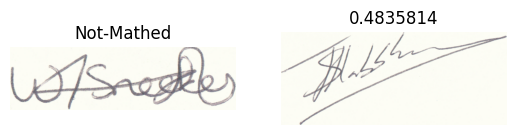

In [30]:
file1 = '068/03_068.png'
file2 = '050/03_050.png'

image1_embedding = vgg_model.predict(load_image('/content/dataset/sign_data/test/' + file1))
# print(image1_embedding)
image2_embedding = vgg_model.predict(load_image('/content/dataset/sign_data/test/' + file2))
# print(image2_embedding)
# print(cosine_similarity(image1_embedding, image2_embedding)[0][0])
similarity = cosine_similarity(image1_embedding, image2_embedding)[0][0]

img1 = cv2.imread('/content/dataset/sign_data/test/' +  file1)
img2 = cv2.imread('/content/dataset/sign_data/test/' +  file2)

text = ''
if similarity > 0.8:
  text = 'Matched'
else:
  text = 'Not-Mathed'

plt.subplot(221), plt.imshow(img1,'gray'),plt.title(text),plt.axis('off')
plt.subplot(222), plt.imshow(img2,'gray'),plt.title(str(similarity)),plt.axis('off')
plt.show()


0 068/09_068.png 068_forg/03_0113068.PNG 1
1/1 [==============================] - 1s 623ms/step


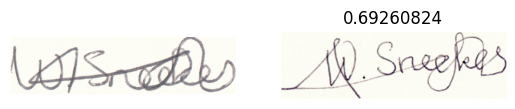

1 068/09_068.png 068_forg/01_0124068.PNG 1
1/1 [==============================] - 1s 595ms/step


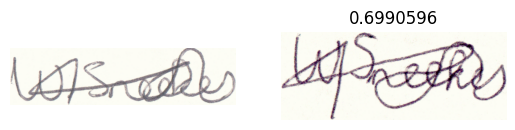

2 068/09_068.png 068_forg/02_0124068.PNG 1
1/1 [==============================] - 1s 616ms/step


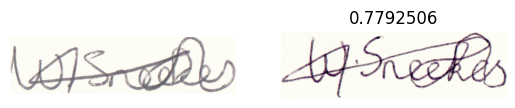

3 068/09_068.png 068_forg/01_0113068.PNG 1
1/1 [==============================] - 1s 599ms/step


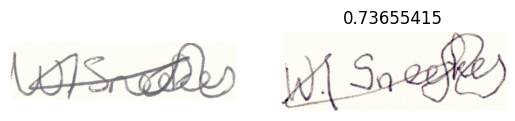

4 068/09_068.png 068_forg/04_0124068.PNG 1
1/1 [==============================] - 1s 611ms/step


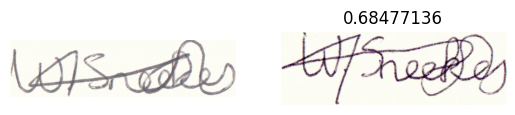

5 068/09_068.png 068_forg/04_0113068.PNG 1
1/1 [==============================] - 1s 598ms/step


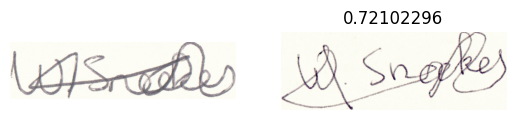

6 068/09_068.png 068_forg/02_0113068.PNG 1
1/1 [==============================] - 1s 1s/step


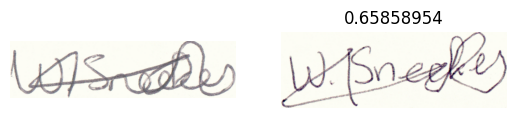

7 068/09_068.png 068_forg/03_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


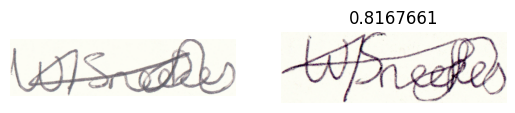

8 068/02_068.png 068_forg/03_0113068.PNG 1
1/1 [==============================] - 1s 1s/step


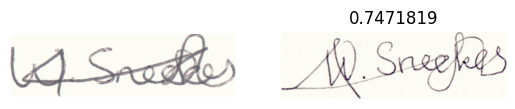

9 068/02_068.png 068_forg/01_0124068.PNG 1
1/1 [==============================] - 1s 993ms/step


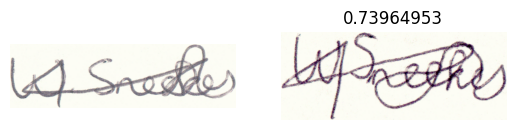

10 068/02_068.png 068_forg/02_0124068.PNG 1
1/1 [==============================] - 1s 601ms/step


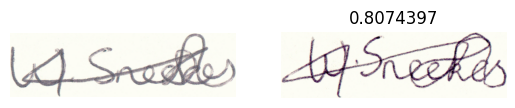

11 068/02_068.png 068_forg/01_0113068.PNG 1
1/1 [==============================] - 1s 601ms/step


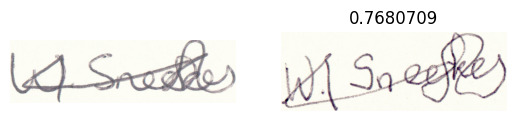

12 068/02_068.png 068_forg/04_0124068.PNG 1
1/1 [==============================] - 1s 607ms/step


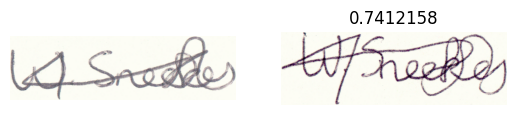

13 068/02_068.png 068_forg/04_0113068.PNG 1
1/1 [==============================] - 1s 589ms/step


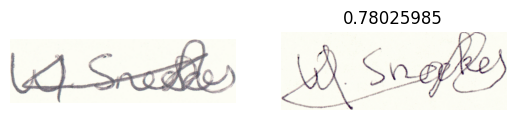

14 068/02_068.png 068_forg/02_0113068.PNG 1
1/1 [==============================] - 1s 610ms/step


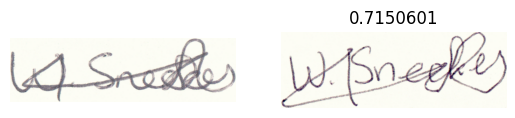

15 068/02_068.png 068_forg/03_0124068.PNG 1
1/1 [==============================] - 1s 610ms/step


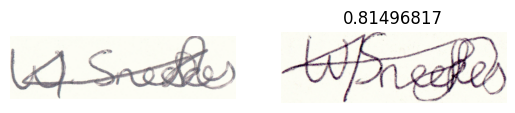

16 068/11_068.png 068_forg/03_0113068.PNG 1
1/1 [==============================] - 1s 845ms/step


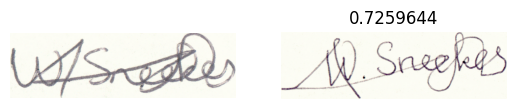

17 068/11_068.png 068_forg/01_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


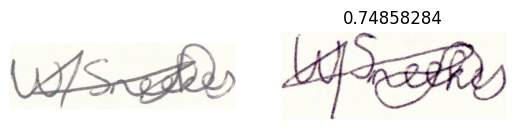

18 068/11_068.png 068_forg/02_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


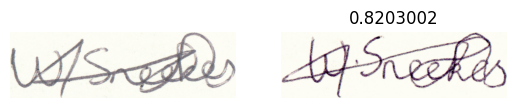

19 068/11_068.png 068_forg/01_0113068.PNG 1
1/1 [==============================] - 1s 1s/step


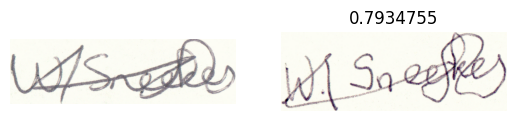

20 068/11_068.png 068_forg/04_0124068.PNG 1
1/1 [==============================] - 1s 607ms/step


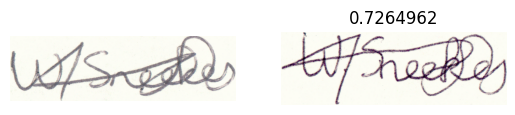

21 068/11_068.png 068_forg/04_0113068.PNG 1
1/1 [==============================] - 1s 692ms/step


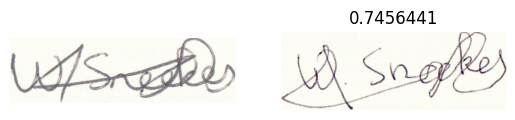

22 068/11_068.png 068_forg/02_0113068.PNG 1
1/1 [==============================] - 1s 595ms/step


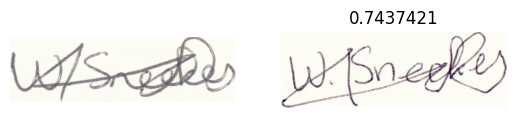

23 068/11_068.png 068_forg/03_0124068.PNG 1
1/1 [==============================] - 1s 603ms/step


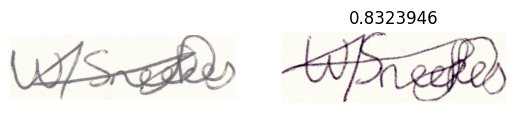

24 068/10_068.png 068_forg/03_0113068.PNG 1
1/1 [==============================] - 1s 591ms/step


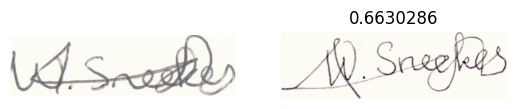

25 068/10_068.png 068_forg/01_0124068.PNG 1
1/1 [==============================] - 1s 879ms/step


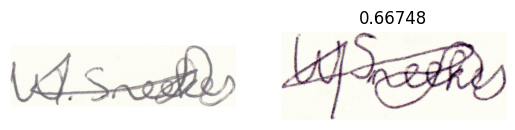

26 068/10_068.png 068_forg/02_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


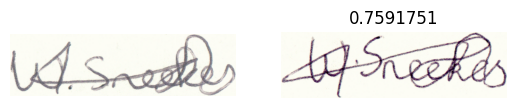

27 068/10_068.png 068_forg/01_0113068.PNG 1
1/1 [==============================] - 1s 1s/step


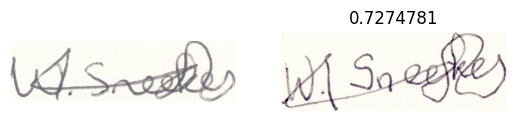

28 068/10_068.png 068_forg/04_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


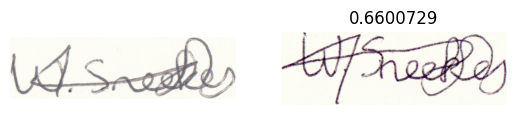

29 068/10_068.png 068_forg/04_0113068.PNG 1
1/1 [==============================] - 1s 597ms/step


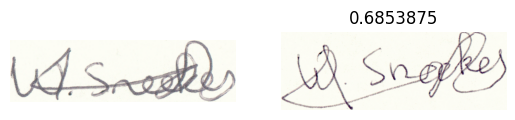

30 068/10_068.png 068_forg/02_0113068.PNG 1
1/1 [==============================] - 1s 601ms/step


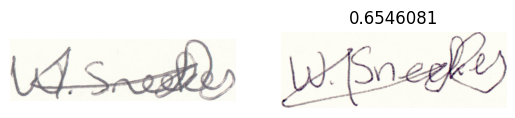

31 068/10_068.png 068_forg/03_0124068.PNG 1
1/1 [==============================] - 1s 596ms/step


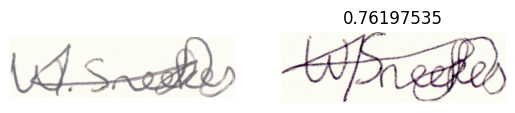

32 068/08_068.png 068_forg/03_0113068.PNG 1
1/1 [==============================] - 1s 600ms/step


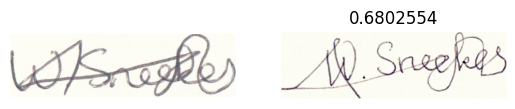

33 068/08_068.png 068_forg/01_0124068.PNG 1
1/1 [==============================] - 1s 606ms/step


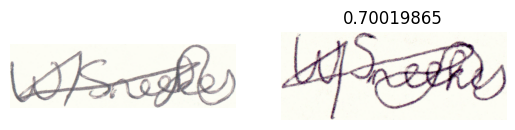

34 068/08_068.png 068_forg/02_0124068.PNG 1
1/1 [==============================] - 1s 615ms/step


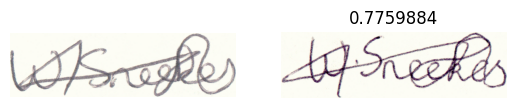

35 068/08_068.png 068_forg/01_0113068.PNG 1
1/1 [==============================] - 1s 783ms/step


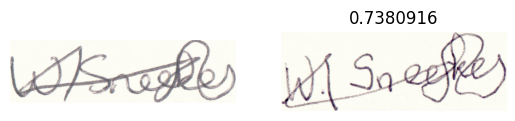

36 068/08_068.png 068_forg/04_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


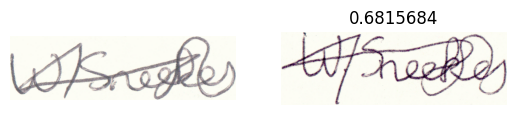

37 068/08_068.png 068_forg/04_0113068.PNG 1
1/1 [==============================] - 1s 1s/step


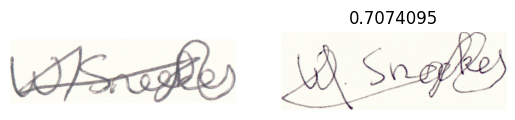

38 068/08_068.png 068_forg/02_0113068.PNG 1
1/1 [==============================] - 1s 1s/step


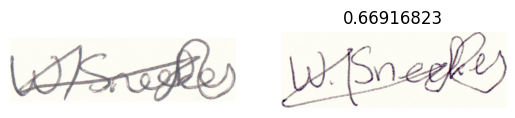

39 068/08_068.png 068_forg/03_0124068.PNG 1
1/1 [==============================] - 1s 613ms/step


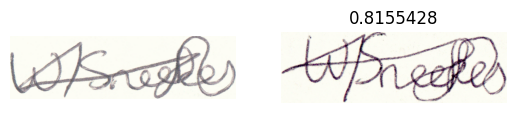

40 068/04_068.png 068_forg/03_0113068.PNG 1
1/1 [==============================] - 1s 591ms/step


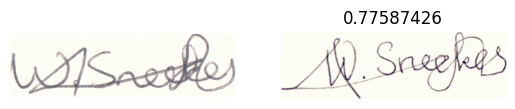

41 068/04_068.png 068_forg/01_0124068.PNG 1
1/1 [==============================] - 1s 637ms/step


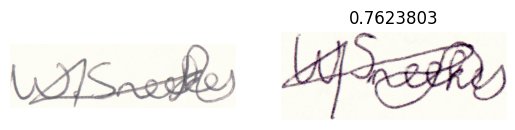

42 068/04_068.png 068_forg/02_0124068.PNG 1
1/1 [==============================] - 1s 596ms/step


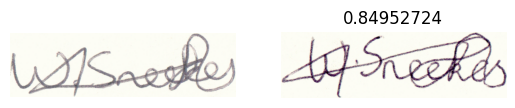

43 068/04_068.png 068_forg/01_0113068.PNG 1
1/1 [==============================] - 1s 614ms/step


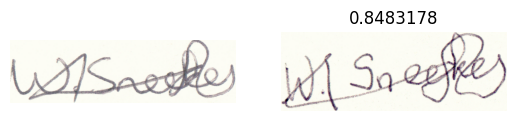

44 068/04_068.png 068_forg/04_0124068.PNG 1
1/1 [==============================] - 1s 624ms/step


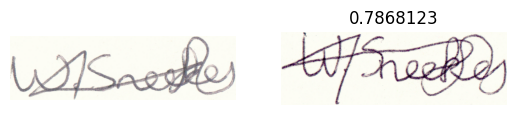

45 068/04_068.png 068_forg/04_0113068.PNG 1
1/1 [==============================] - 1s 1s/step


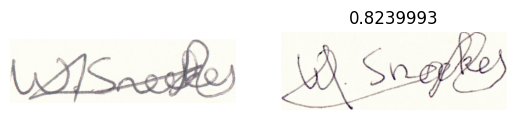

46 068/04_068.png 068_forg/02_0113068.PNG 1
1/1 [==============================] - 1s 1s/step


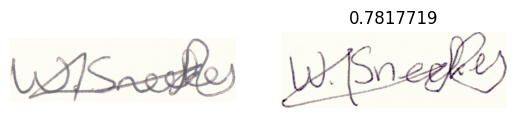

47 068/04_068.png 068_forg/03_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


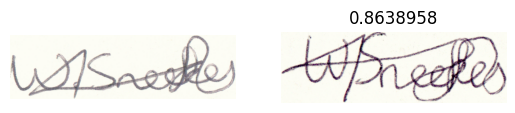

48 068/12_068.png 068_forg/03_0113068.PNG 1
1/1 [==============================] - 1s 1s/step


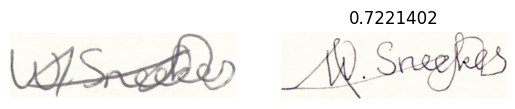

49 068/12_068.png 068_forg/01_0124068.PNG 1
1/1 [==============================] - 1s 603ms/step


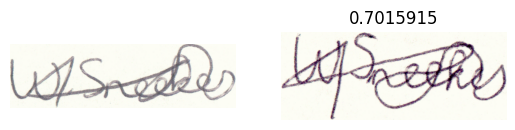

50 068/12_068.png 068_forg/02_0124068.PNG 1
1/1 [==============================] - 1s 621ms/step


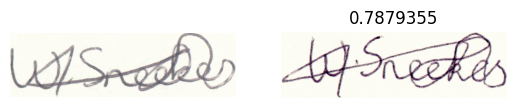

51 068/12_068.png 068_forg/01_0113068.PNG 1
1/1 [==============================] - 1s 603ms/step


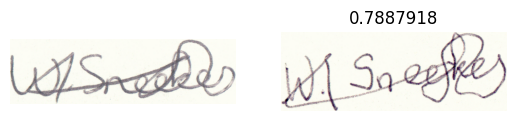

52 068/12_068.png 068_forg/04_0124068.PNG 1
1/1 [==============================] - 1s 670ms/step


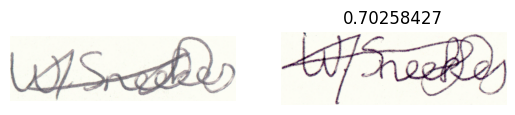

53 068/12_068.png 068_forg/04_0113068.PNG 1
1/1 [==============================] - 1s 606ms/step


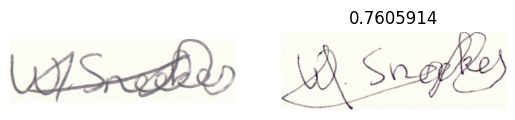

54 068/12_068.png 068_forg/02_0113068.PNG 1
1/1 [==============================] - 1s 637ms/step


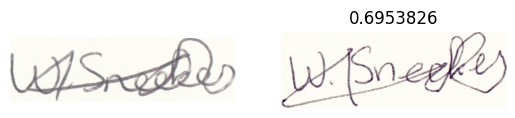

55 068/12_068.png 068_forg/03_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


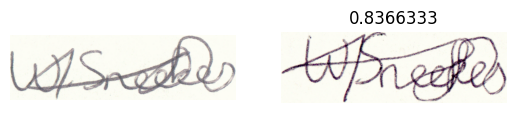

56 068/03_068.png 068_forg/03_0113068.PNG 1
1/1 [==============================] - 1s 1s/step


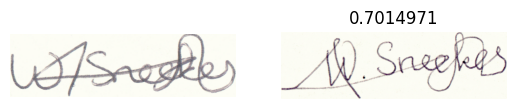

57 068/03_068.png 068_forg/01_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


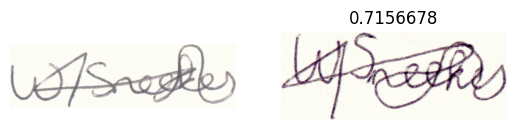

58 068/03_068.png 068_forg/02_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


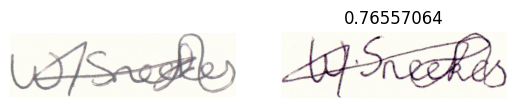

59 068/03_068.png 068_forg/01_0113068.PNG 1
1/1 [==============================] - 1s 617ms/step


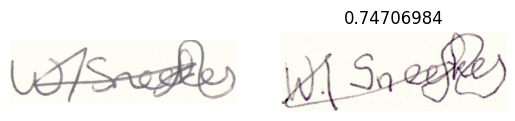

60 068/03_068.png 068_forg/04_0124068.PNG 1
1/1 [==============================] - 1s 622ms/step


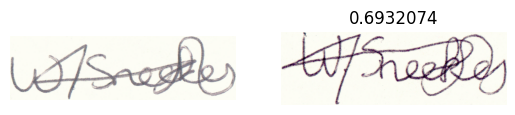

61 068/03_068.png 068_forg/04_0113068.PNG 1
1/1 [==============================] - 1s 630ms/step


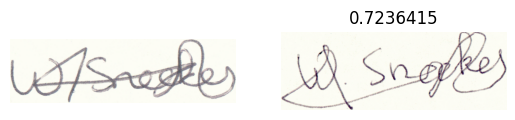

62 068/03_068.png 068_forg/02_0113068.PNG 1
1/1 [==============================] - 1s 632ms/step


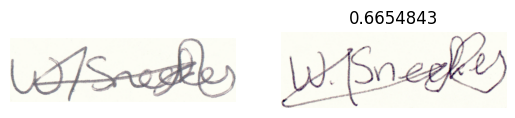

63 068/03_068.png 068_forg/03_0124068.PNG 1
1/1 [==============================] - 1s 628ms/step


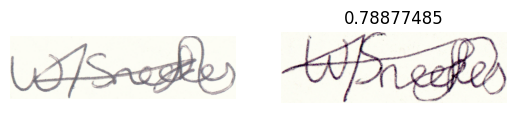

64 068/05_068.png 068_forg/03_0113068.PNG 1
1/1 [==============================] - 1s 649ms/step


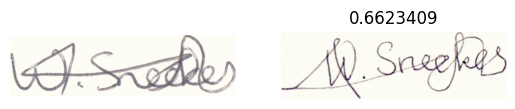

65 068/05_068.png 068_forg/01_0124068.PNG 1
1/1 [==============================] - 1s 1s/step


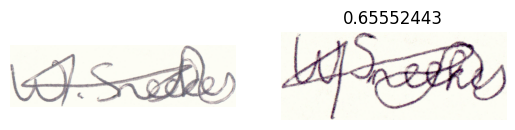

66 068/05_068.png 068_forg/02_0124068.PNG 1


KeyboardInterrupt: ignored

In [23]:
new_column_values = []
for index, row in test_df.iterrows():
    print(index,row['image1'],row['image2'],row['result'])

    image1_embedding = vgg_model.predict(load_image('/content/dataset/sign_data/test/' +  row['image1']))
    # print(image1_embedding)
    image2_embedding = vgg_model.predict(load_image('/content/dataset/sign_data/test/' + row['image2']))
    # print(image2_embedding)
    # print(cosine_similarity(image1_embedding, image2_embedding)[0][0])
    similarity = cosine_similarity(image1_embedding, image2_embedding)[0][0]
    new_column_values.append(similarity)

    img1 = cv2.imread('/content/dataset/sign_data/test/' +  row['image1'])
    img2 = cv2.imread('/content/dataset/sign_data/test/' +  row['image2'])
    plt.subplot(221), plt.imshow(img1,'gray'),plt.title(''),plt.axis('off')
    plt.subplot(222), plt.imshow(img2,'gray'),plt.title(str(similarity)),plt.axis('off')
    plt.show()


In [ ]:
test_df['predicted'] = new_column_values

In [ ]:
test_df.to_csv('prediction.csv')